# Librería **simplenn**

[simplenn](https://github.com/facundoq/simplenn) es una librería de uso didáctico para comprender como se implementan las redes neuronales modernas en frameworks como [Keras](https://keras.io/) o [Pytorch](https://pytorch.org/). Fue diseñada para ser simple de entender e _implementar_. También es simple de utilizar. Por ejemplo, para definir y entrenar una red neuronal para clasificación con de tres capas con distintas funciones de activación, podemos escribir un código muy similar al de estos frameworks:

fit:  39%|███▉      | 39/100 [00:00<00:00, 387.33it/s, error: 0.66158]The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Arquitectura de la Red:
-------------------------------
Linear_11 → params: 20
Bias_11 → params: 10
ReLU_5 → params: 0
Linear_12 → params: 200
Bias_12 → params: 20
TanH_4 → params: 0
Linear_13 → params: 40
Bias_13 → params: 2
Softmax_4 → params: 0
Total parameters: 292
-------------------------------

fit: 100%|██████████| 100/100 [00:00<00:00, 377.67it/s, error: 0.66157]


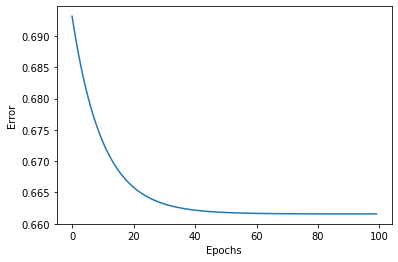

Accuracy final del modelo: 0.00%


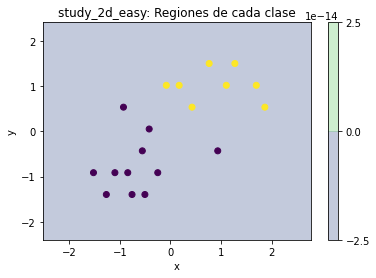

In [5]:
%load_ext autoreload
%autoreload 2

import datasets

dataset_name="study_2d_easy"
x,y,classes = datasets.load(dataset_name)
x -= x.mean(axis=0)
x /= x.std(axis=0)
n,din=x.shape
n_classes=y.max()+1



import simplenn as sn

# Definición del modelo
layers = [sn.Linear(din,10),
          sn.Bias(10),
          sn.ReLU(),
          sn.Linear(10,20),
          sn.Bias(20),
          sn.TanH(),
          sn.Linear(20,n_classes),
          sn.Bias(n_classes),
          sn.Softmax()
          ]
error = sn.MeanError(sn.CrossEntropyWithLabels())
model = sn.Sequential(layers,error)
print("Arquitectura de la Red:")
print(model.summary())

# Algoritmo de optimización
gd = sn.GradientDescent(lr=0.1)

# Algoritmo de optimización
history = model.fit(x,y,epochs=100,batch_size=16,optimizer=gd)
sn.plot.plot_history(history)


# Reporte del desempeño
y_pred = model.predict(x)
y_pred_labels = y_pred.argmax(axis=1)
print(f"Accuracy final del modelo: {sn.measures.accuracy(y,y_pred)*100:0.2f}%")


if din ==2:
    # Visualización del modelo
    sn.plot.plot_model_dataset_2d_classification(x,y,model,title=dataset_name)

# Componentes de la librería

Describimos los componentes básicos de la librería utilizados en el código anterior, para proveer el contexto de los ejercicios a realizar. 


# Módulo **datasets**


El módulo `datasets` que permite cargar algunos conjuntos de datos de prueba fácilmente, de modo de verificar y experimentar con los modelos

```python
dataset_name="study_2d_easy"
x,y,classes = datasets.load(dataset_name)
x -= x.mean(axis=0)
x /= x.std(axis=0)
n,din=x.shape
n_classes=y.max()+1
```

Para ver qué otros conjuntos de datos tiene este módulo, podés ejecutar `datasets.get_names()` y obtener una lista de nombres de conjuntos de datos que soporta el módulo:

In [15]:
print("Los conjuntos de datos disponibles son:")
print(datasets.get_names())
print()

# Ejemplo de carga de otro dataset
x,y,classes=datasets.load("iris")
print("Clases del dataset iris:")
print(classes)

Los conjuntos de datos disponibles son:
['iris', 'study_1d', 'study_2d', 'study_2d_easy', 'study_regression_1d', 'boston', 'red_wine', 'white_wine']

Clases del dataset iris:
['setosa', 'versicolor', 'virginica']


# Clases y módulos de simplenn

Para usar `simplenn`, importamos la librería y la llamamos `sn` de modo que sea más legible su uso.
```python
import simplenn as sn
```

La librería tiene varias clases para crear modelos:


* Las clases `Linear`, `Bias`, que permiten crear capas con las funciones $wx$ y $x+b$ respectivamente. En estos casos, $w$ y $b$ son parámetros a optimizar. Combinando estas capas se puede formar una capa densa tradicional que calcula $wx+b$.
* Las clases`TanH`, `ReLU` y `Softmax`, que permiten crear capas con las funciones de activación de esos nombres.
* La clase `CrossEntropyWithLabels`, una capa que permite calcular el error de la red basado en entropía cruzada  _para cada ejemplo_. Esta capa además se combina con `MeanError` que permite calcular el error promedio de otra capa de error que calcula el mismo _para cada ejemplo_, como la capa `CrossEntropyWithLabels` que mencionamos, u otras como `MeanSquaredError` para el error cuadrático medio.
* La clase `Sequential` para crear redes secuenciales, donde donde la salida de cada capa es la entrada de la capa siguiente, y hay solo una capa inicial y una final.
    * Esta clase además necesita una capa de error para crearse, de modo de poder entrenar la misma.

```python
layers = [sn.Linear(din,10),
          sn.Bias(10),
          sn.ReLU(),
          sn.Linear(10,20),
          sn.Bias(20),
          sn.TanH(),
          sn.Linear(20,n_classes),
          sn.Bias(n_classes),
          sn.Softmax()
          ]
error = sn.MeanError(sn.CrossEntropyWithLabels())
model = sn.Sequential(layers,error)
```

Además, tiene clases y métodos para entrenarlos:

* La clase `Sequential` tiene el método `fit` que permite, dados arreglos `x` e `y`, entrenar un modelo para minimizar su error en este conjunto de datos. 
* Para este entrenamiento, debe especificarse un algoritmo de optimización. En este caso utilizamos descenso de gradiente simple con la clase `GradientDescent`, una tasa de aprendizaje de `0.1`, `100` épocas y un tamaño de lote de 16.

```python
# Algoritmo de optimización
gd = sn.GradientDescent(lr=0.1)

# Algoritmo de optimización
history = model.fit(x,y,epochs=100,batch_size=16,optimizer=gd)
```

Por último, podemos utilizar y evaluar el modelo:
* El método `predict` permite obtener las predicciones del modelo. 
    * La salida obtenida es la de la última capa, sin el error
    * Para un problema de clasificación, debemos calcular el argmax ya que la salida son probabilidades de clase para cada ejemplo.
* El módulo `measures` tiene algunas funciones para evaluar métricas de desempeño del mismo.
* El módulo `plot` tiene algunas funciones para monitorear el entrenamiento del modelo (`plot_history`) y, en el caso en que el problema sea de pocas dimensiones (1 o 2), también visualizar las fronteras de decisión o la función ajustada (`plot_model_dataset_2d_classification`)

```python
sn.plot.plot_history(history)

y_pred = model.predict(x)
y_pred_labels = y_pred.argmax(axis=1)
print(f"Accuracy final del modelo: {sn.measures.accuracy(y,y_pred)*100:0.2f}%")

if din ==2:
    # Visualización del modelo
    sn.plot.plot_model_dataset_2d_classification(x,y,model,title=dataset_name)
```

Como habrás notado, si bien podemos definir así la red y ejecutar el método `fit` para pedirle al modelo que se entrene con descenso de gradiente, esta red no aprende, ya que no están implementados correctamente ninguno de los métodos correspondientes de las capas y algoritmos de aprendizaje. 

Tu objetivo es implementar las distintas capas de la librería `simplenn`, así como algunos inicializadores y algoritmos de optimización.


# Implementación de referencia 

El [repositorio de simplenn](https://github.com/facundoq/simplenn) contiene una implementación de referencia, que se enfoca en ser fácil de entender, y no en la eficiencia de cómputo.

En base al código de esa implementación de referencia, y un programa que lo procesa, se generó una versión de simplenn en donde se quitaron partes cruciales de la implementación de cada capa y otras clases.

Para poder reimplementar la librería, tendrás que buscar las líneas de código entre los comentarios `""" COMPLETAR COMIENZO """` y `""" COMPLETAR FIN """` y completar con el código correspondiente.

En todos los casos, es importante enfocarse en buscar una implementación fácil de entender y que sea correcta, y dejar de lado la eficiencia para una implementación posterior.

Si bien esta guía de implementación está en español, la implementación de la librería se ha realizado en inglés para que sea más fácil relacionar los conceptos con los de otras librerías.

Los siguientes notebooks te guiarán en la implementación de cada capa, tanto en el método forward y el backward, y métodos importantes de otras clases.

En caso de duda, siempre puedes consultar la [implementación de referencia](https://github.com/facundoq/simplenn).